In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target


In [3]:
# Create a DataFrame for easier exploration
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

df


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
print("Feature names:", diabetes.feature_names)
print("Target name: 'target'")
print("Number of samples:", len(X))

df.head()


Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target name: 'target'
Number of samples: 442


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importing regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


# Initialize regression models
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN Regressor': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=500)
}

results = {}
best_model_name = None
best_model_r2 = -float('inf')

for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    results[name] = {
        'y_pred': y_pred,
        'mean_absolute_error': mean_absolute_error(y_test, y_pred),
        'mean_squared_error': mean_squared_error(y_test, y_pred),
        'r2_score': r2_score(y_test, y_pred)
    }
    
    print(f"\n{name} Results")
    print("Mean Absolute Error:", results[name]['mean_absolute_error'])
    print("Mean Squared Error:", results[name]['mean_squared_error'])
    print("R^2 Score:", results[name]['r2_score'])
    
    # Check if this is the best model so far
    if results[name]['r2_score'] > best_model_r2:
        best_model_r2 = results[name]['r2_score']
        best_model_name = name

# Print the best model
print(f"\nBest Model: {best_model_name} with R^2 score {best_model_r2:.2f}")



Linear Regression Results
Mean Absolute Error: 42.79409467959994
Mean Squared Error: 2900.19362849348
R^2 Score: 0.4526027629719197

Ridge Regression Results
Mean Absolute Error: 46.13885766697452
Mean Squared Error: 3077.41593882723
R^2 Score: 0.41915292635986545

Lasso Regression Results
Mean Absolute Error: 49.73032753662261
Mean Squared Error: 3403.5757216070733
R^2 Score: 0.3575918767219115

Elastic Net Results
Mean Absolute Error: 63.70590076411911
Mean Squared Error: 5311.21282167187
R^2 Score: -0.0024652131111431164

Decision Tree Results
Mean Absolute Error: 55.438202247191015
Mean Squared Error: 4967.191011235955
R^2 Score: 0.06246720611075551

Random Forest Results
Mean Absolute Error: 43.769101123595505
Mean Squared Error: 2923.1551651685395
R^2 Score: 0.4482688862230161

Gradient Boosting Results
Mean Absolute Error: 44.84528454706202
Mean Squared Error: 2926.5145572279075
R^2 Score: 0.4476348175479713

SVR Results
Mean Absolute Error: 56.02372412801096
Mean Squared Error

c:\Users\hasee\anaconda3\envs\py311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE, MSE, RMSE: Lower values indicate better performance.

R² Score: Higher values indicate better performance, with a maximum of 1 (perfect fit).


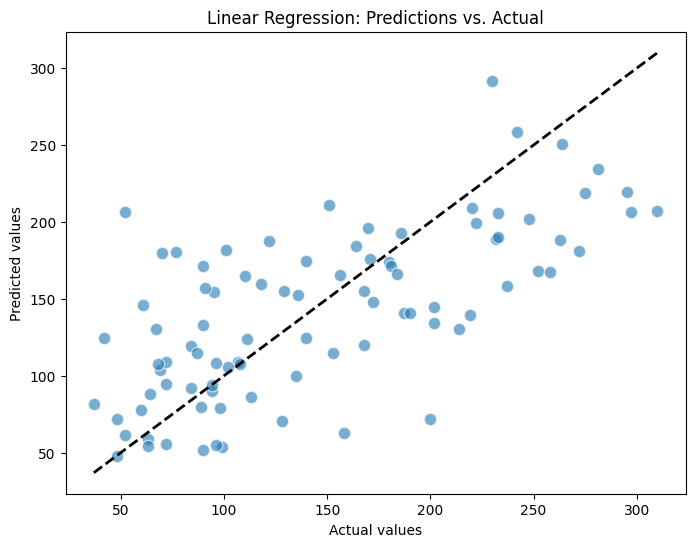

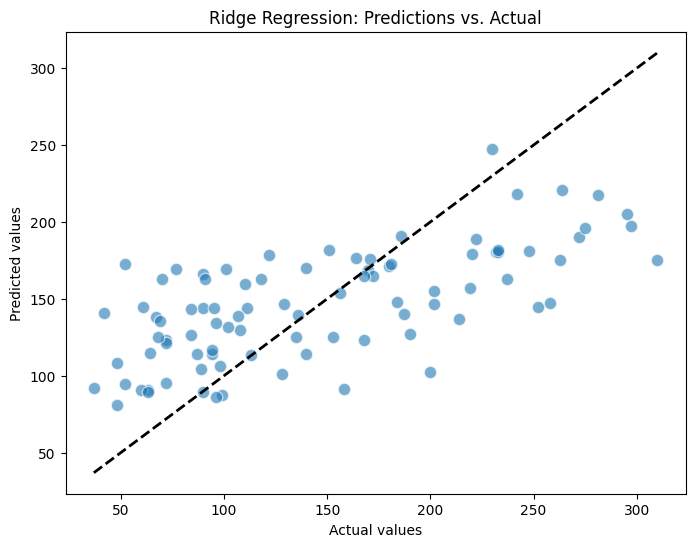

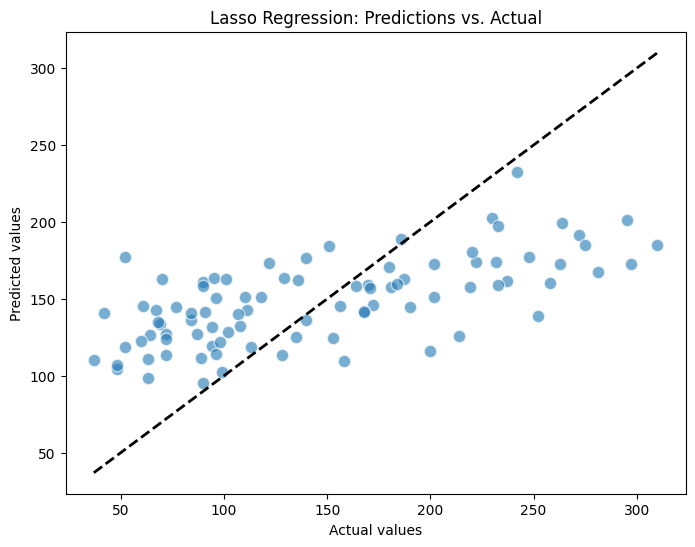

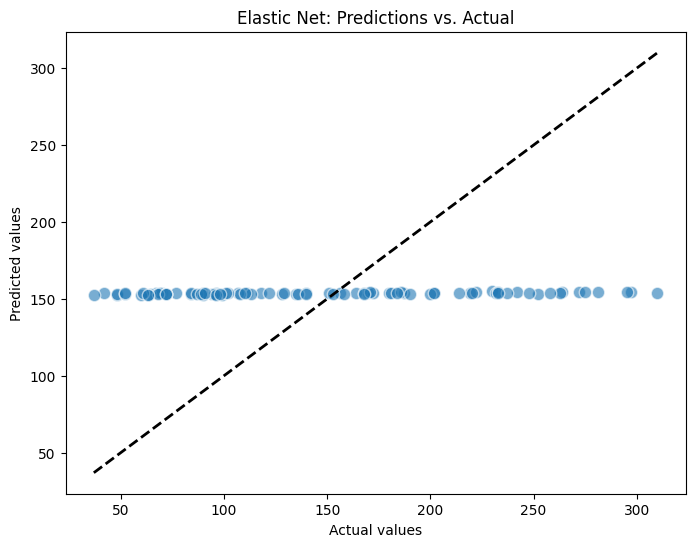

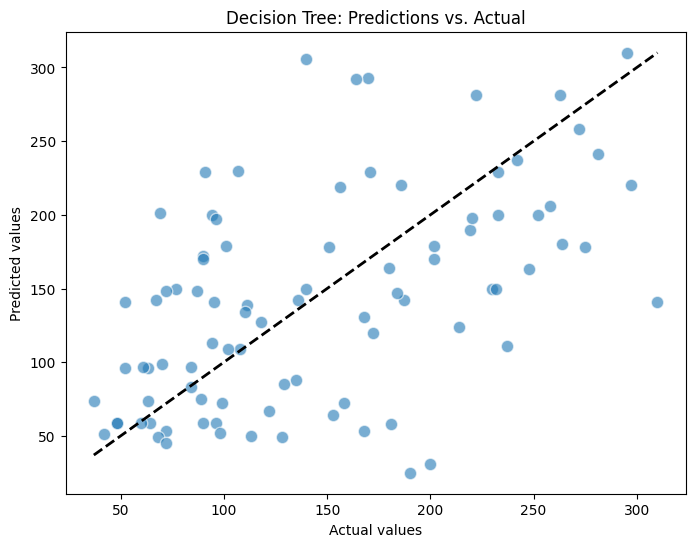

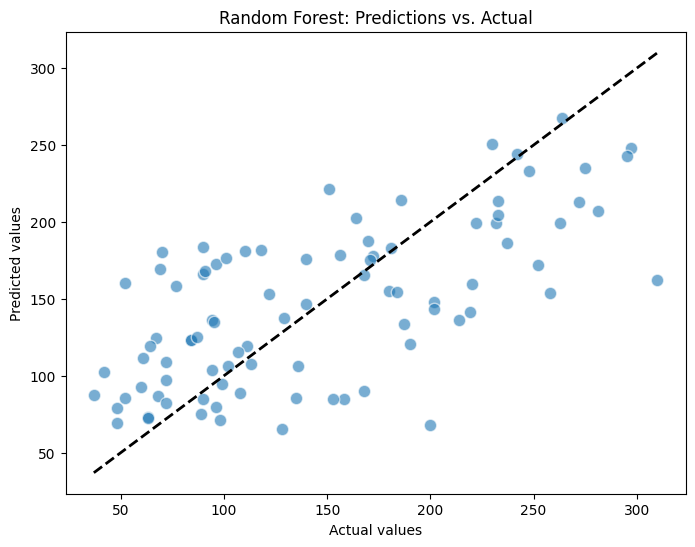

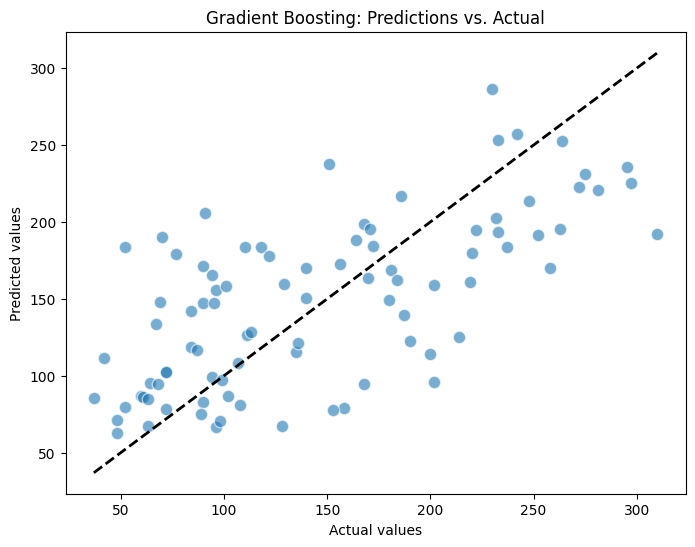

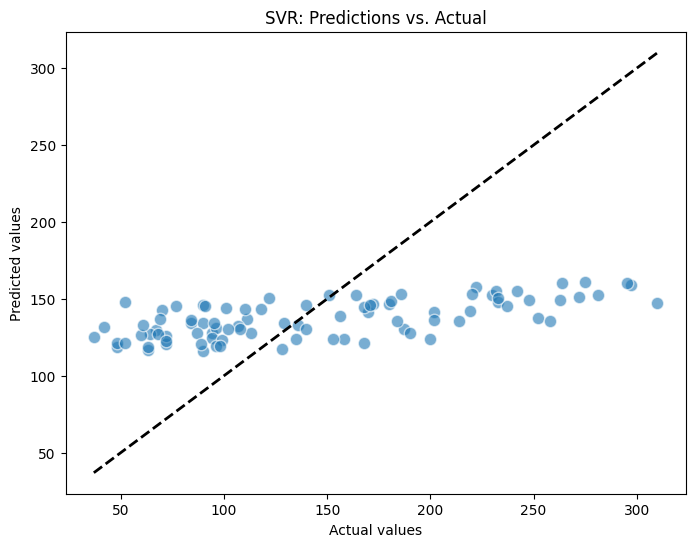

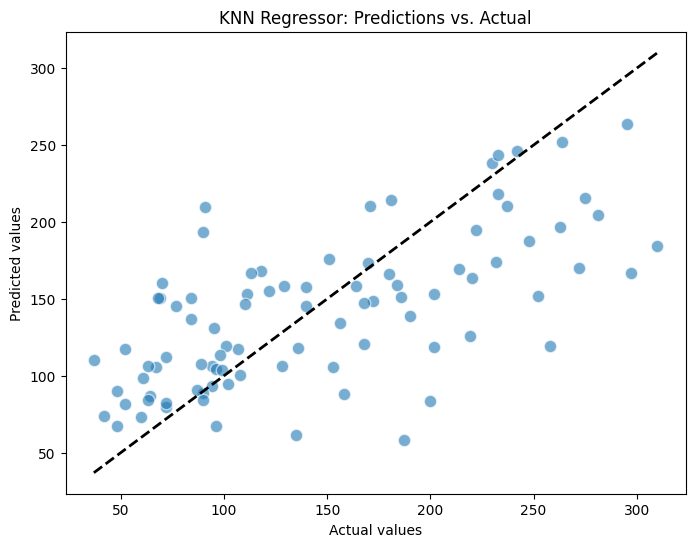

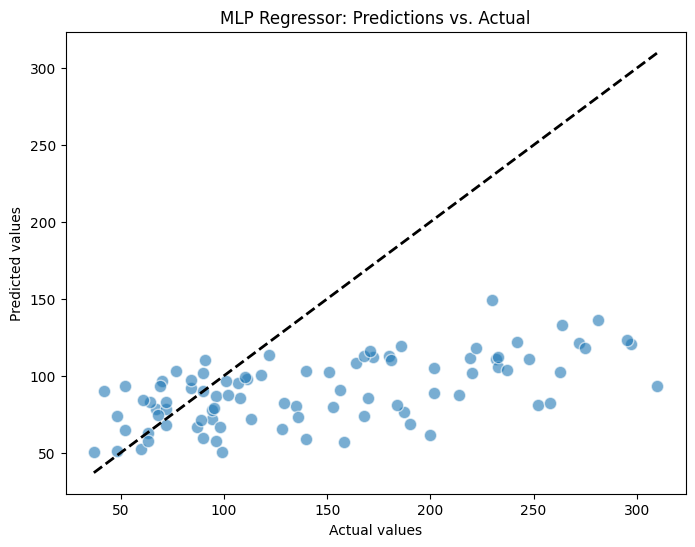

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot predictions vs. actual values
def plot_predictions_vs_actual(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="w", s=80)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title(f'{model_name}: Predictions vs. Actual')
    plt.show()

# Plot for each model
for name, reg in regressors.items():
    y_pred = reg.predict(X_test)
    plot_predictions_vs_actual(y_test, y_pred, name)


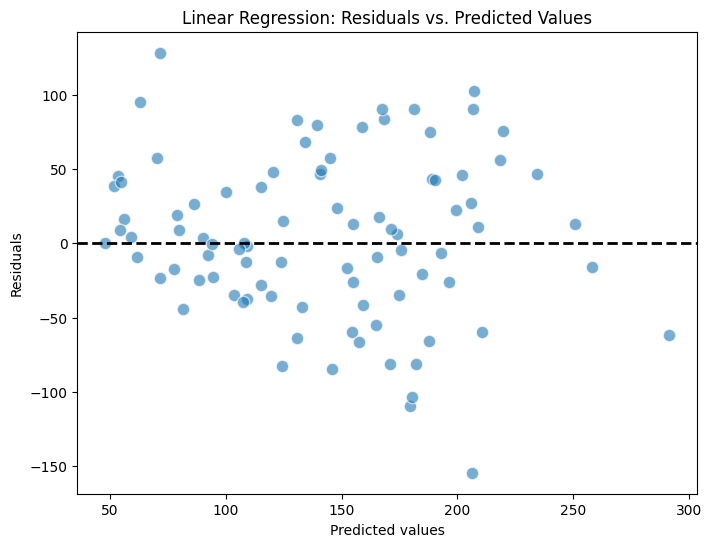

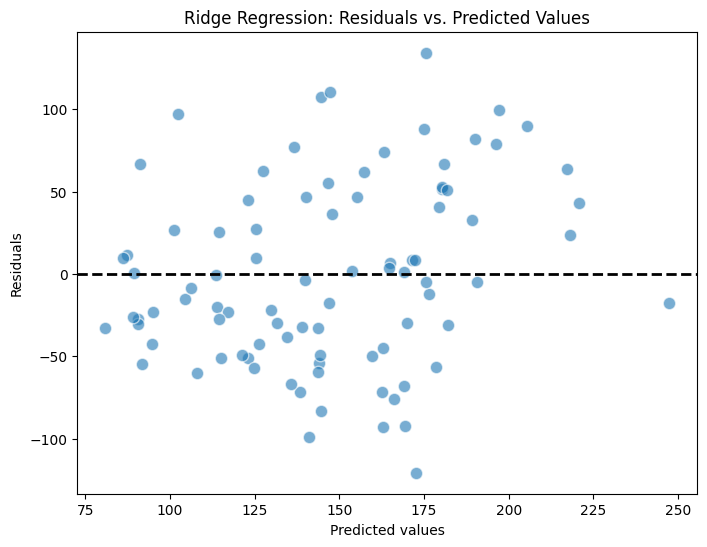

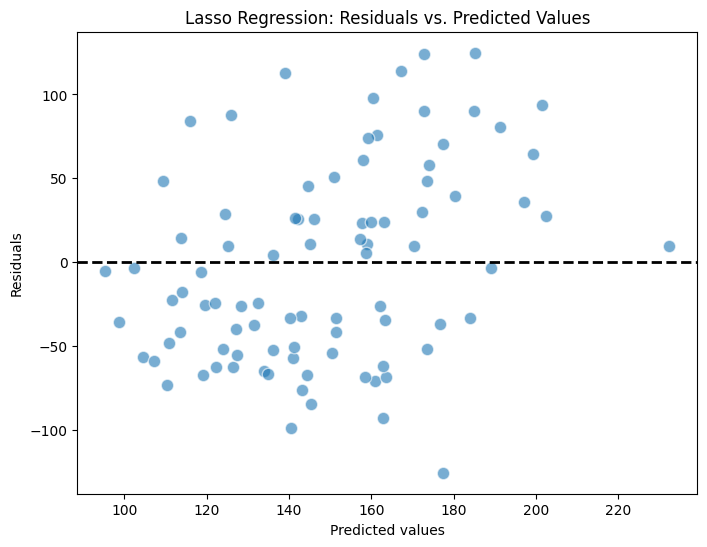

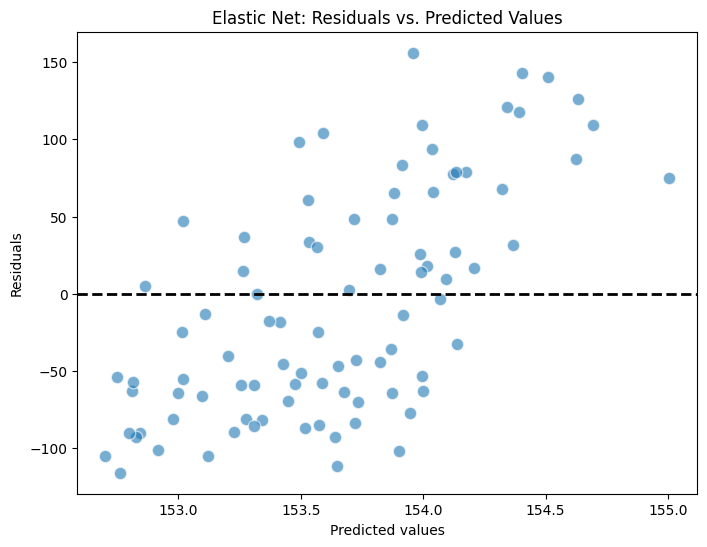

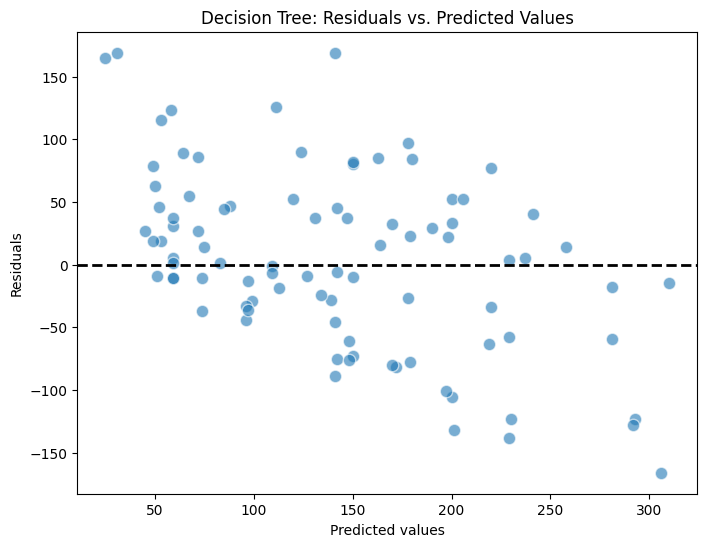

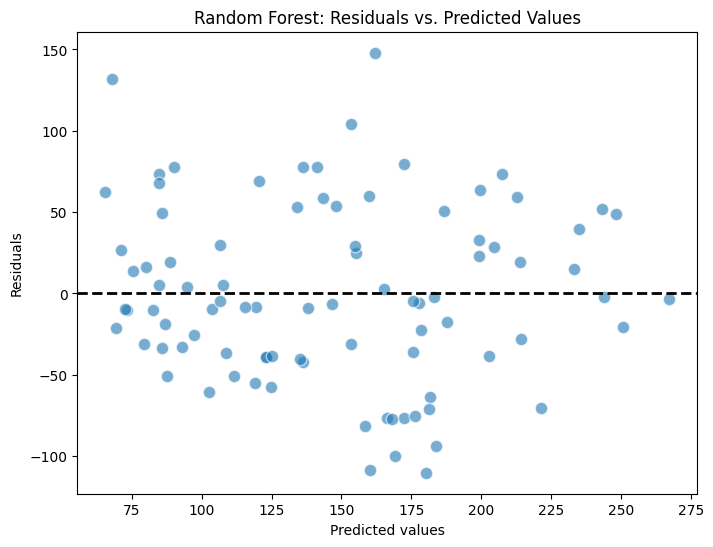

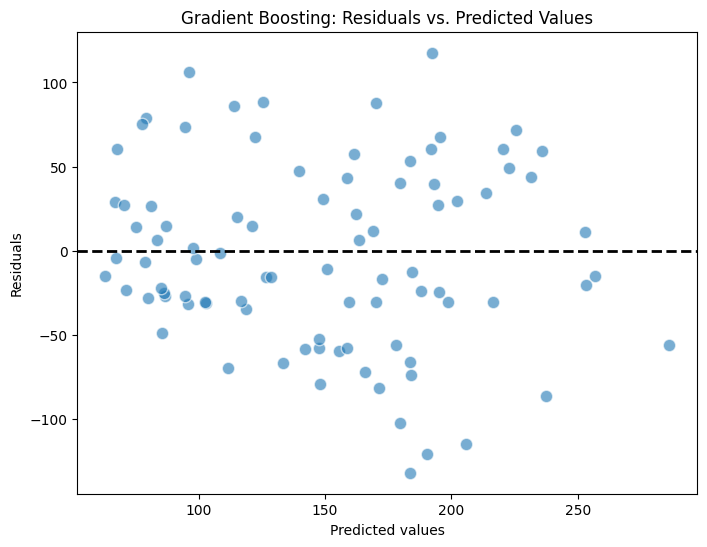

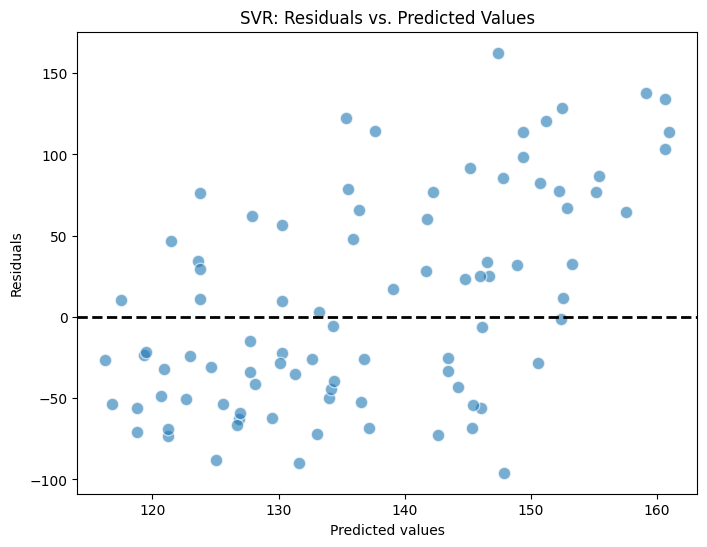

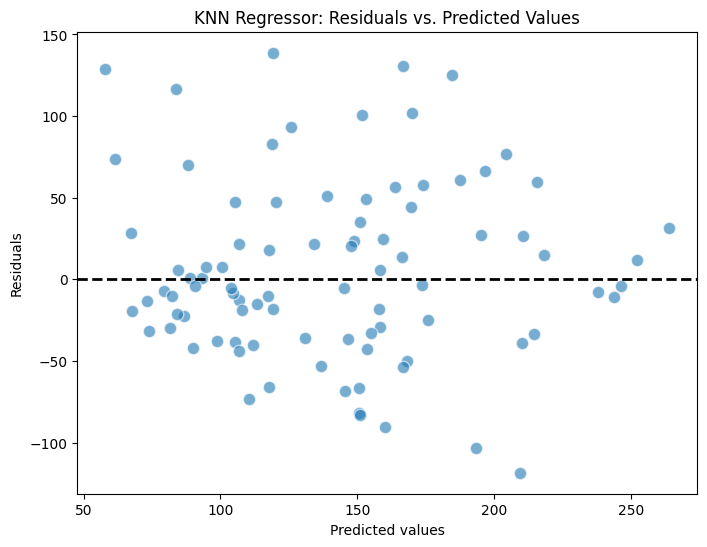

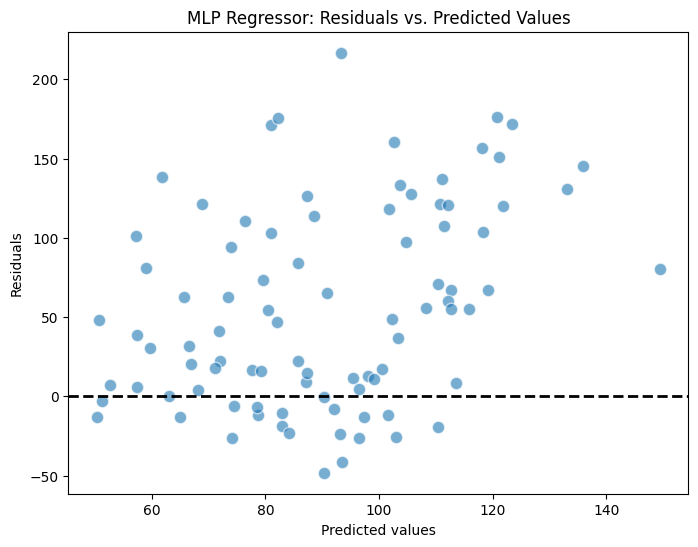

In [14]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.6, edgecolors="w", s=80)
    plt.axhline(0, color='k', linestyle='--', lw=2)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name}: Residuals vs. Predicted Values')
    plt.show()

# Plot for each model
for name, reg in regressors.items():
    y_pred = reg.predict(X_test)
    plot_residuals(y_test, y_pred, name)


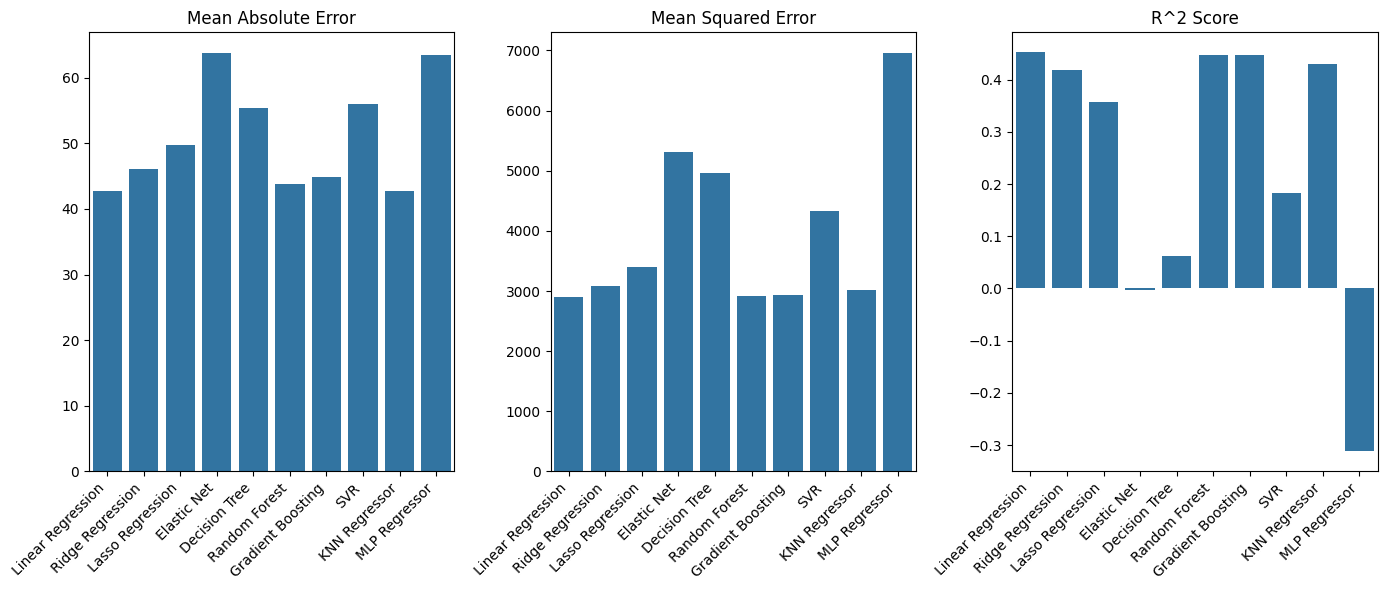

In [15]:
def plot_error_metrics(results):
    metrics = {
        'MAE': [results[name]['mean_absolute_error'] for name in regressors],
        'MSE': [results[name]['mean_squared_error'] for name in regressors],
        'R^2 Score': [results[name]['r2_score'] for name in regressors]
    }

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 3, 1)
    sns.barplot(x=list(regressors.keys()), y=metrics['MAE'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Mean Absolute Error')

    plt.subplot(1, 3, 2)
    sns.barplot(x=list(regressors.keys()), y=metrics['MSE'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Mean Squared Error')

    plt.subplot(1, 3, 3)
    sns.barplot(x=list(regressors.keys()), y=metrics['R^2 Score'])
    plt.xticks(rotation=45, ha='right')
    plt.title('R^2 Score')

    plt.tight_layout()
    plt.show()

plot_error_metrics(results)
